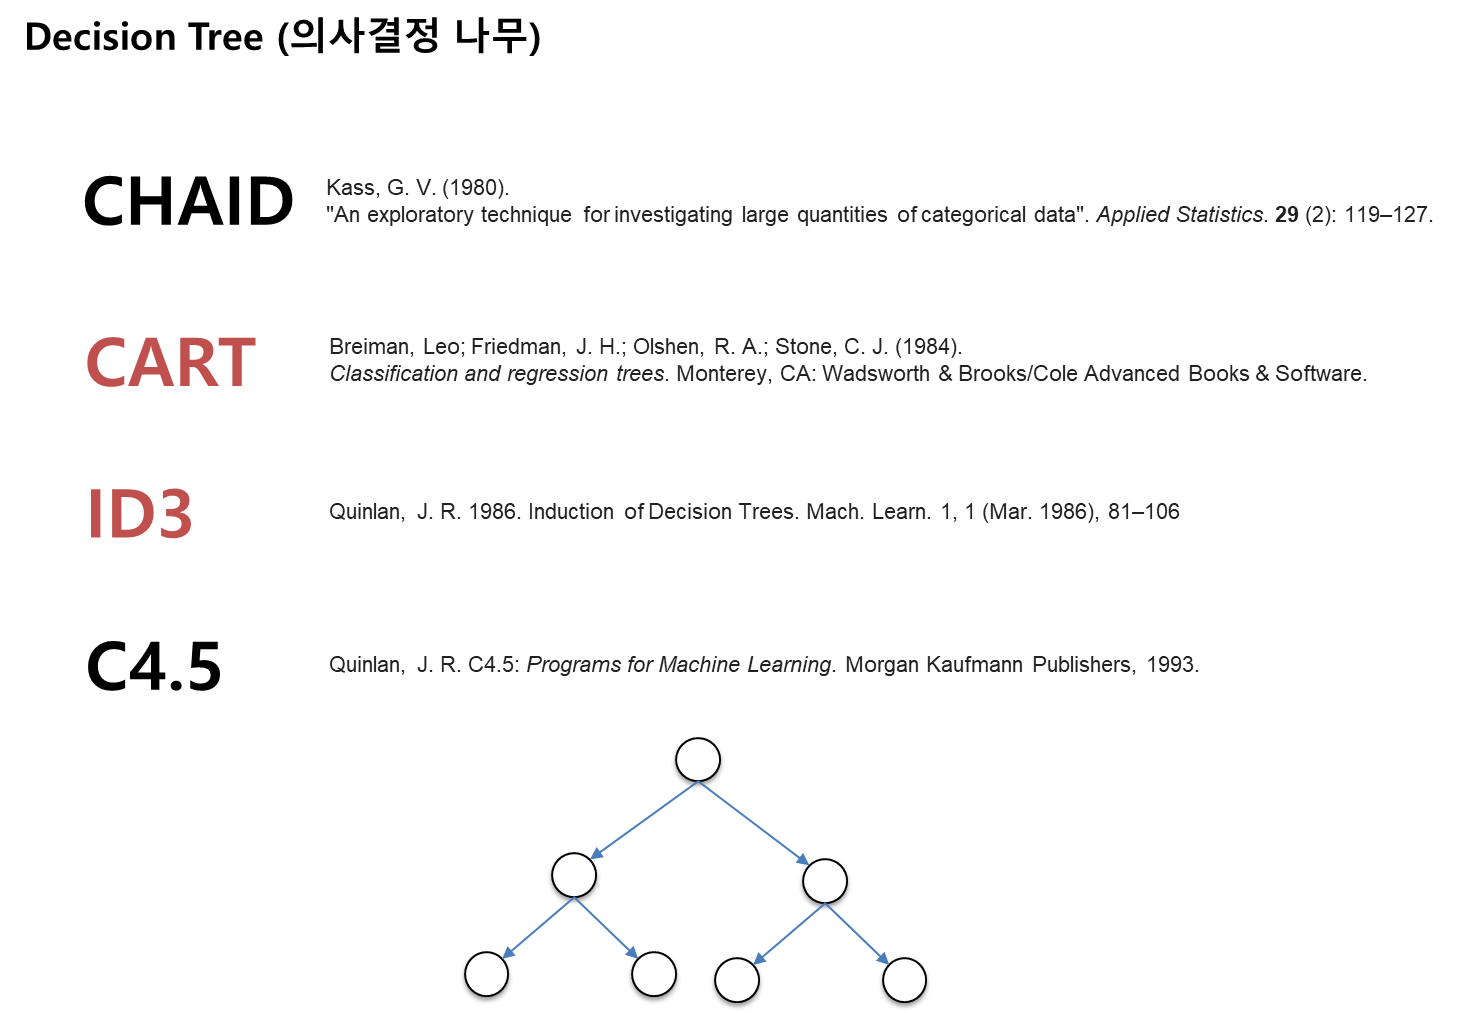


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

도시계획 현황 통계
http://www.eum.go.kr/web/cp/st/stUpisStatDet.jsp



인구 감소 지역 지정
https://www.mois.go.kr/frt/sub/a06/b06/populationDecline/screen.do

In [ ]:
# prompt: 코랩에서 한글을 출력할 수 있게 해주세요

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



In [6]:

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=66ef786538650" -O "data.zip"
!unzip  -O cp949 "data.zip" -d "data"

In [ ]:

"""학습용 데이터셋을 불러옴"""
data = pd.read_excel('data/Ⅰ. 도시일반현황/1-2-3.도시·군기본계획 주요지표.xls', skiprows=2, header=[0,1,2], dtype='str')

cols = ['도시명', '수립일', '목표년도', '계획인구', '시가화예정용지', '보전용지', '시가화용지', '주거용지', '상업용지', '공업용지', '관리용지']
data.columns = cols

data = data[~data['수립일'].isnull()]


data[['목표년도', '계획인구', '시가화예정용지', '보전용지', '시가화용지', '주거용지', '상업용지', '공업용지', '관리용지']] = data[['목표년도', '계획인구', '시가화예정용지', '보전용지', '시가화용지', '주거용지', '상업용지', '공업용지', '관리용지']].astype('int64')


data.shape

In [ ]:

"""인구감소지역"""
감소지역 = ['가평군','연천군','고성군', '삼척시', '양구군', '양양군', '영월군', '정선군', \
        '철원군', '태백시', '평창군', '홍천군', '화천군', '횡성군', '괴산군', '단양군', \
        '보은군', '영동군', '옥천군', '제천시', '공주시', '금산군', '논산시', '보령시', \
        '부여군', '서천군', '예산군', '청양군', '태안군', '고창군', '김제시', '남원시', \
        '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '강진군', \
        '고흥군', '곡성군', '구례군', '보성군', '신안군', '장흥군', '함평군', '담양군',\
        '영광군', '영암군', '완도군', '장성군', '진도군', '해남군', '화순군', '군위군', \
        '고령군', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군', '영양군', \
        '영주시', '영천시', '울릉군', '울진군', '의성군', '청도군', '청송군', '거창군', \
        '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군', \
        '함양군', '합천군']


data['감소지역'] = data['도시명'].apply(lambda x : 1 if x in 감소지역 else 0)
data.shape

In [ ]:

특광역시 = ['서울특별시 ', '부산광역시 ', '인천광역시 ', '대구광역시 ', '대전광역시 ', '광주광역시 ', '울산광역시 ']

data = data[~data['도시명'].isin(특광역시)]
data.shape

In [ ]:

""" Tree 모형 분석을 위하 주변 도로 면적비율과, 대지면적 비율 만 불러옴 (계획인구=X, 시가화용지=y)"""
tmp = data[['계획인구', '시가화용지', '감소지역']]

""" plot으로 고온그룹과 저온그룹을 2차원에 표시"""
x1 = np.array(tmp[tmp['감소지역'] == 1][['계획인구', '시가화용지']].values)
y1 = np.array(tmp[tmp['감소지역'] == 1]['감소지역'].values)
y1 = y1.reshape(y1.shape[0], 1)

x2 = np.array(tmp[tmp['감소지역'] == 0][['계획인구', '시가화용지']].values)
y2 = np.array(tmp[tmp['감소지역'] == 0]['감소지역'].values)
y2 = y2.reshape(y2.shape[0], 1)


plt.figure(figsize=(9, 9))
plt.scatter(x=x1[:,0], y=x1[:,1], marker='x', color='red', label='감소지역')
plt.scatter(x=x2[:,0], y=x2[:,1], marker='o', color='blue', label='비감소지역')
plt.legend(fontsize=10)
plt.show()

# **GiniIndex 계산**

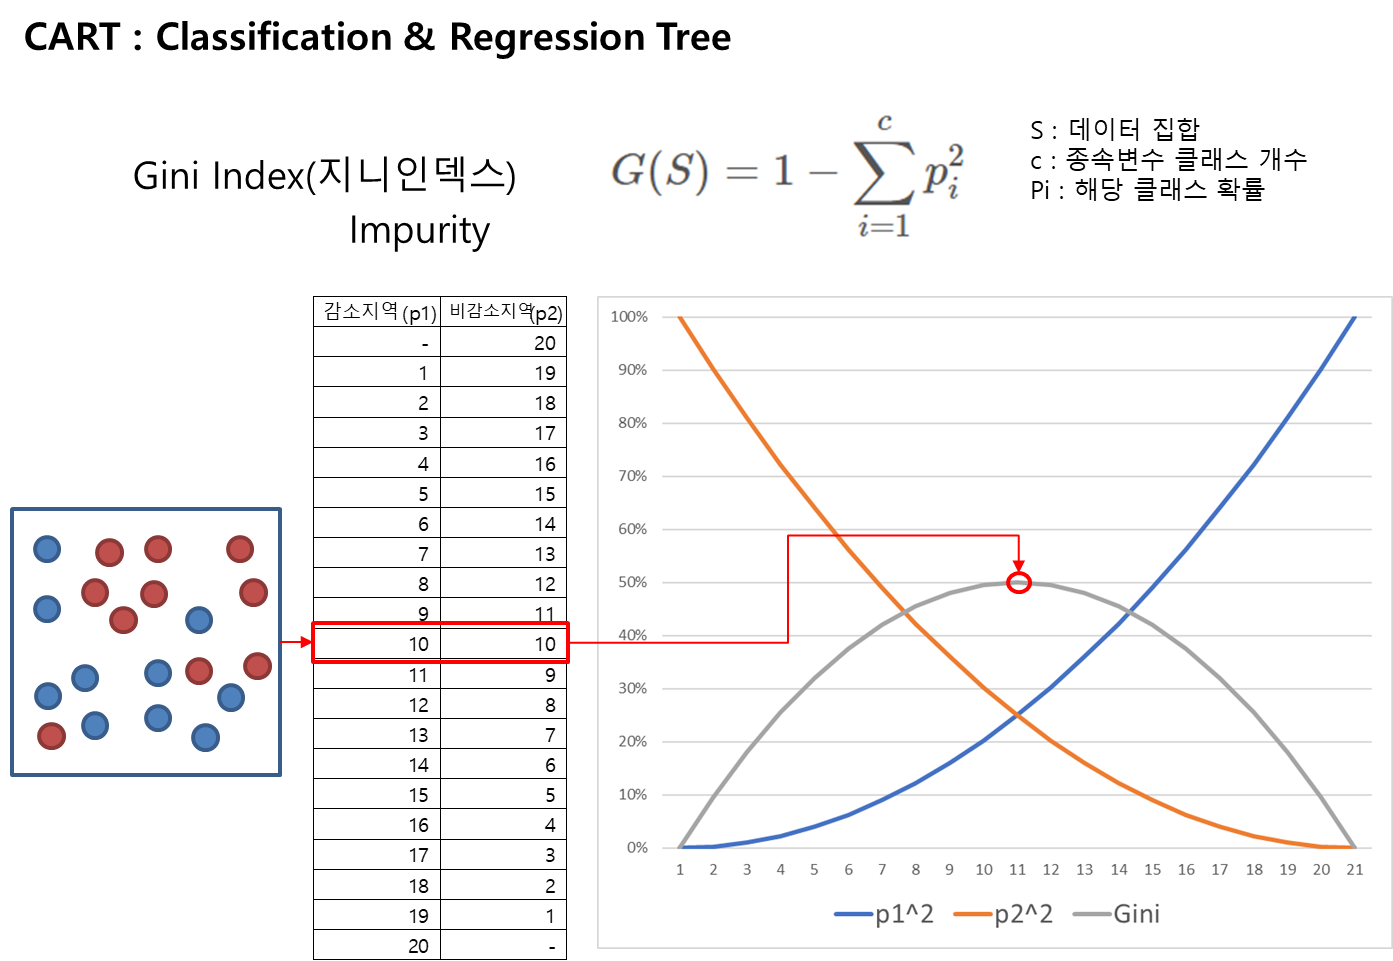

In [ ]:

#%%
tmp = data[['계획인구', '시가화용지', '감소지역']]


"""학습을 위하 pandas를 numpy로 변환하여 x와 y 배열 생성"""
x = np.array(tmp[['계획인구', '시가화용지']].values)
y = np.array(tmp['감소지역'].values)
y = y.reshape(y.shape[0], 1) #x배열과 shape를 같게 reshape

print(x.shape)
print(y.shape)

In [13]:
"""지니인덱스 계산 함수"""
def GiniIndex(y):
    total = len(y)
    G = 1
    for c in np.unique(y): #종속변수의 갯수로 loop
        # print(str(c) + "값 : " + str(np.power(np.where(y == c, 1, 0).sum() / total, 2)))
        G = G - np.power(np.where(y == c, 1, 0).sum() / total, 2)
    return G

In [15]:
# prompt: (120,1) shape의 0과 1로 구성된 numpy값을 전달하면 giniindex를 계산하는 과정을 출력하는 함수 생성

def calculate_gini_index_with_process(y):
  """
  (120,1) shape의 0과 1로 구성된 numpy값을 전달하면 giniindex를 계산하는 과정을 출력하는 함수

  Args:
      y: (120, 1) shape의 0과 1로 구성된 numpy 배열

  Returns:
      None
  """
  total = len(y)
  G = 1
  print("Initial Gini Index:", G)
  for c in np.unique(y):
    count_c = np.where(y == c, 1, 0).sum()
    probability_c = count_c / total
    print(f"Class {c}: Count = {count_c}, Probability = {probability_c}")
    G = G - np.power(probability_c, 2)
    print(f"Gini Index after considering class {c}: {G}")
  print("Final Gini Index:", G)



In [ ]:
calculate_gini_index_with_process(y)

In [ ]:
GiniIndex(y)

# **최적의 분할 기준 정하기**

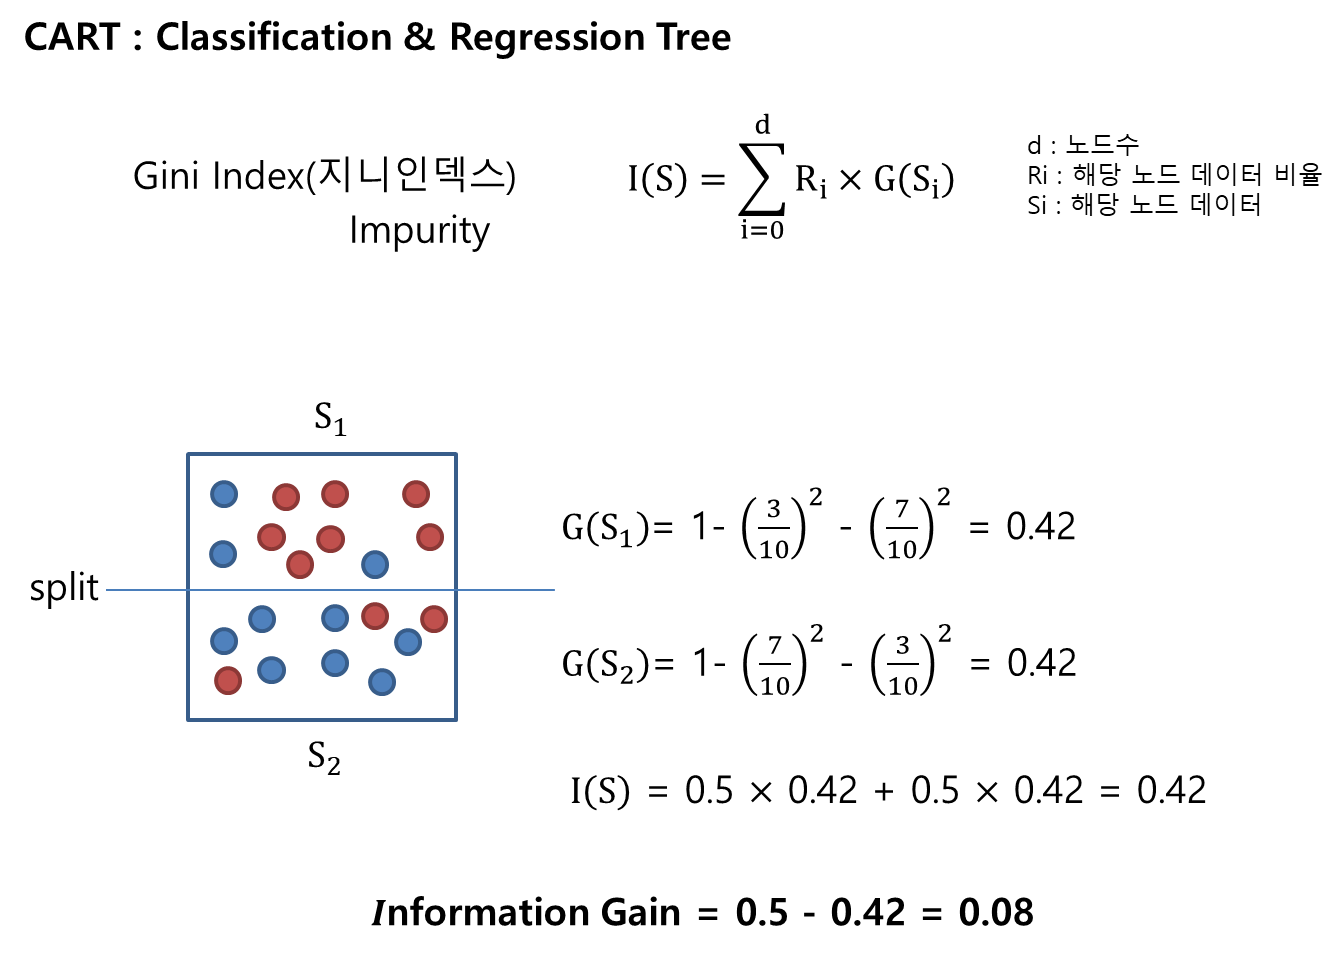

In [ ]:

"""입력변수를 정렬한 후 모든 구간에서 잘라서 giniindex를 계산하여 출력 """

criteria = x[:,0]
criteria = np.sort(np.unique(criteria))
total = len(y)
I = np.array([])
for f,l in zip(criteria[:-1], criteria[1:]):
    split = np.mean([f, l])

    s1 = y[np.where(x[:,0] < split, True, False)]
    s2 = y[np.where(x[:,0] > split, True, False)]

    Gini = len(s1) / total *  GiniIndex(s1) + len(s2) / total * GiniIndex(s2)

    I = np.append(I, np.array([f, l, split, Gini]))

I = I.reshape(int(I.shape[0]/4), 4)


plt.figure(figsize=(15, 7))
plt.title('계획인구')
plt.scatter(x=I[:,2], y=I[:,3],  marker='o', color='grey', label='Gini')
plt.show()

In [ ]:

#%%
""" 분할 지니인덱스 계산을 함수로 변환하여 모든 입력 변수에 대해서 계산하여 출력"""
def split_loop(x,y):
    criteria = x
    criteria = np.sort(np.unique(criteria))
    total = len(y)
    I = np.array([])
    for f,l in zip(criteria[:-1], criteria[1:]):
        split = np.mean([f, l])

        s1 = y[np.where(x < split, True, False)]
        s2 = y[np.where(x > split, True, False)]

        Gini = len(s1) / total *  GiniIndex(s1) + len(s2) / total * GiniIndex(s2)

        I = np.append(I, np.array([f, l, split, Gini]))

    I = I.reshape(int(I.shape[0]/4), 4)
    return I

I1 = split_loop(x[:,0], y)
I2 = split_loop(x[:,1], y)

plt.figure(figsize=(15, 7))
ax1 = plt.subplot()
ax2 = ax1.twiny()

ax1.scatter(x=I1[:,2], y=I1[:,3],  marker='o', color='blue', label='계획인구')
ax2.scatter(x=I2[:,2], y=I2[:,3],  marker='x', color='red', label='시가화용지')

ax1.legend(fontsize=10)
ax2.legend(fontsize=10)
plt.show()

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import classification_report, confusion_matrix

tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(x,y)

score_tr = tree_clf.score(x, y)


dt_dot_data  = export_graphviz(tree_clf,
                               feature_names=['계획인구', '시가화용지'],
                               class_names=['nolow', 'low'],         # 종속변수
                               rounded = True,
                               filled = True)

graph = Source(dt_dot_data)
display(graph)

In [ ]:

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(x,y)

score_tr = tree_clf.score(x, y)


dt_dot_data  = export_graphviz(tree_clf,
                               feature_names=['계획인구', '시가화용지'],
                               class_names=['nolow', 'low'],         # 종속변수
                               rounded = True,
                               filled = True)

graph = Source(dt_dot_data)
display(graph)

In [ ]:

tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(x,y)

score_tr = tree_clf.score(x, y)


dt_dot_data  = export_graphviz(tree_clf,
                               feature_names=['계획인구', '시가화용지'],
                               class_names=['nolow', 'low'],         # 종속변수
                               rounded = True,
                               filled = True)

graph = Source(dt_dot_data)
display(graph)

In [ ]:

"""변수중요도"""
feature_imp = tree_clf.feature_importances_
n_feature = len(['계획인구', '시가화용지'])
idx = np.arange(n_feature)

plt.figure(figsize=(5, 1))
plt.barh(idx, feature_imp, align='center')
plt.yticks(idx, ['계획인구', '시가화용지'])
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
for i, fi in zip(idx, feature_imp):
    plt.text(0.5, i,'%s' %fi, va='center', ha='center')
plt.show()

In [ ]:
# prompt: Dtree 로 분석한 tree_clf의 변수 중요도가 각 depth를 통과하면서 어떻게 변화하는지 보여줘

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import classification_report, confusion_matrix

# 변수 중요도 변화 확인을 위한 함수 정의
def analyze_feature_importance_by_depth(x, y, max_depth):
  feature_importance_by_depth = []
  for depth in range(1, max_depth + 1):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(x, y)
    feature_importance_by_depth.append(tree_clf.feature_importances_)
  return feature_importance_by_depth

# 변수 중요도 분석 실행
feature_importance_by_depth = analyze_feature_importance_by_depth(x, y, 10)

# 결과 시각화
plt.figure(figsize=(10, 6))
depths = range(1, 11)
for i, feature_importance in enumerate(feature_importance_by_depth):
  plt.plot(depths[i], feature_importance[0], 'bo', label='계획인구' if i == 0 else None)
  plt.plot(depths[i], feature_importance[1], 'ro', label='시가화용지' if i == 0 else None)

plt.xlabel('Depth')
plt.ylabel('Feature Importance')
plt.title('Feature Importance 변화 (Depth에 따른)')
plt.legend()
plt.show()



In [ ]:
# prompt: Dtree 로 분석한 tree_clf가 depth가 증가할수록 정확도가 어떻게 증가하는지 보여줘

from sklearn.model_selection import train_test_split

# 데이터를 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 최대 깊이를 바꿔가면서 의사결정 트리를 학습하고 정확도를 측정
train_accuracies = []
test_accuracies = []
max_depths = range(1, 11)  # 1부터 10까지의 깊이를 확인

for depth in max_depths:
  tree_clf = DecisionTreeClassifier(max_depth=depth)
  tree_clf.fit(x_train, y_train)
  train_accuracy = tree_clf.score(x_train, y_train)
  test_accuracy = tree_clf.score(x_test, y_test)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)


# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, 'bo-', label='Train Accuracy')
plt.plot(max_depths, test_accuracies, 'ro-', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy 변화 (Depth에 따른)')
plt.legend()
plt.show()


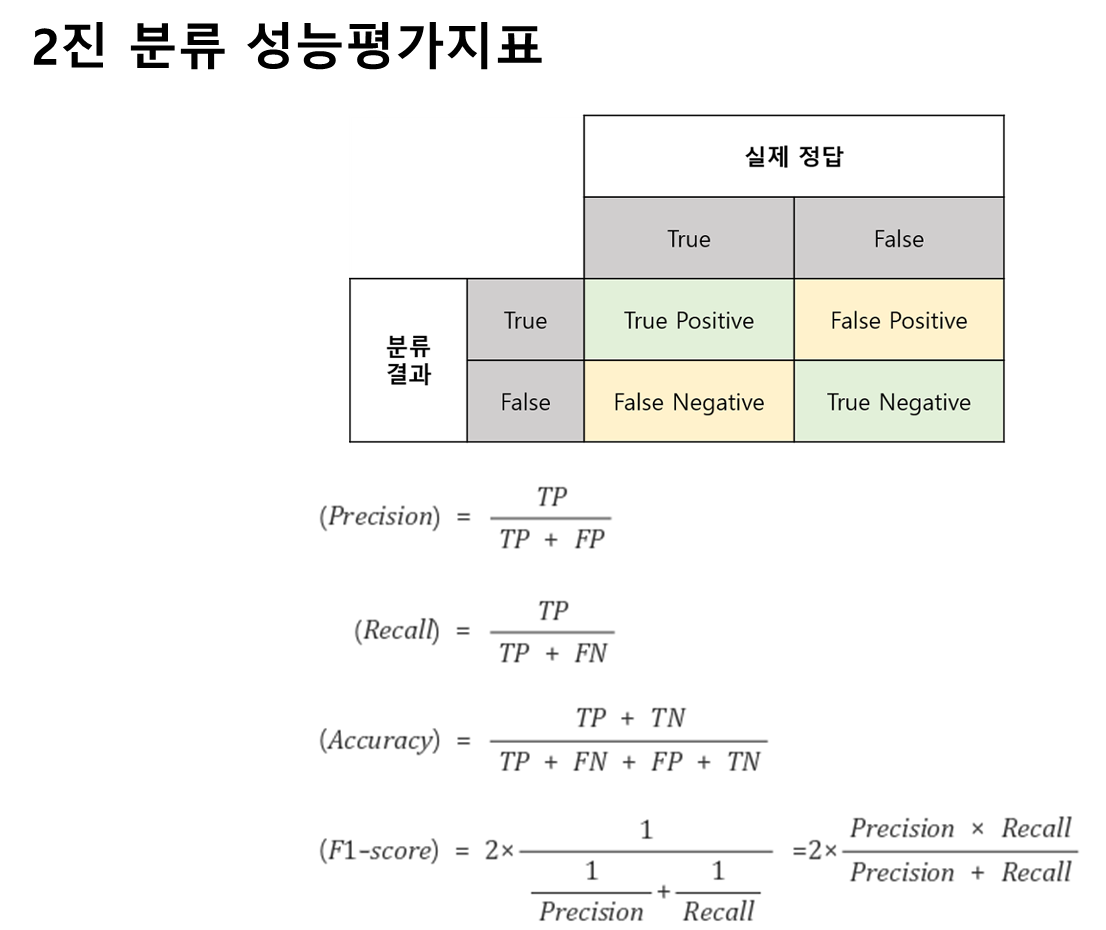

In [ ]:

#%%
""" 이진분류 성능평가 지표"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

y_pred = tree_clf.predict(x)

n = np.concatenate((y,  y_pred.reshape([y_pred.shape[0],1])), axis=1)

print("Confusition matrix: \n{}".format(confusion_matrix(y,y_pred)))
print("precision_score: {}".format( precision_score(y,y_pred)))
print("recall_score: {}".format( recall_score(y,y_pred)))
print("accuracy_score: {}".format( accuracy_score(y,y_pred)))
print("F1 Score: {}".format( f1_score(y,y_pred)))

In [ ]:
# prompt: tree_clf의 ROC 커브를 표시해주고 AUC 의 면적을 색칠하고, ROC 커브의 의미를 적어줘

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#%%
""" 이진분류 성능평가 지표"""


tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

y_pred = tree_clf.predict(x)

n = np.concatenate((y,  y_pred.reshape([y_pred.shape[0],1])), axis=1)

print("Confusition matrix: \n{}".format(confusion_matrix(y,y_pred)))
print("precision_score: {}".format( precision_score(y,y_pred)))
print("recall_score: {}".format( recall_score(y,y_pred)))
print("accuracy_score: {}".format( accuracy_score(y,y_pred)))
print("F1 Score: {}".format( f1_score(y,y_pred)))

fpr, tpr, thresholds = roc_curve(y, tree_clf.predict_proba(x)[:, 1])
fpr, tpr, thresholds

plt.plot(fpr, tpr, 'o-', label="")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR(Recall)')
plt.title('Dtree ROC Curve')

# AUC 면적 색칠
auc_score = roc_auc_score(y, tree_clf.predict_proba(x)[:,1])
plt.fill_between(fpr, tpr, alpha=0.5)

plt.text(0.6, 0.2, f'AUC: {auc_score:.2f}')
plt.show()

print('AUC : ' + str(auc_score))

# ROC 커브의 의미
print("ROC 커브는 다양한 분류 임계값에서 모델의 성능을 시각화한 그래프입니다.")
print("x축은 False Positive Rate (FPR)이고, y축은 True Positive Rate (TPR)입니다.")
print("FPR은 실제 Negative인 샘플을 Positive로 잘못 분류한 비율이고, TPR은 실제 Positive인 샘플을 Positive로 제대로 분류한 비율입니다.")
print("즉, ROC 커브는 모델이 Negative와 Positive를 얼마나 잘 구분하는지를 나타냅니다.")
print("AUC (Area Under the Curve)는 ROC 커브 아래의 면적을 나타내며, 모델의 분류 성능을 나타냅니다.")
print("AUC가 1에 가까울수록 모델의 성능이 좋다는 것을 의미합니다.")


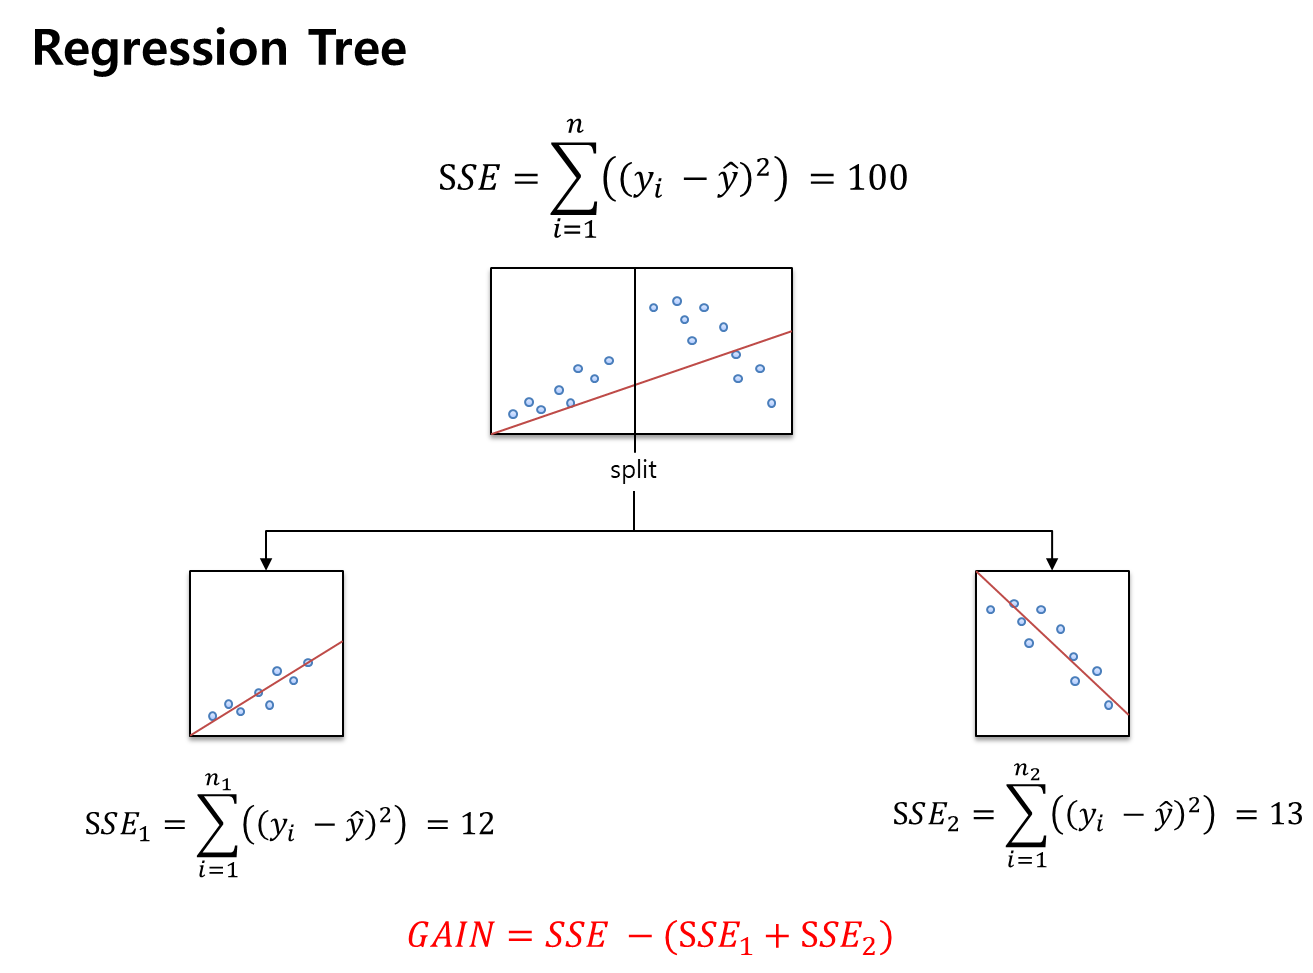

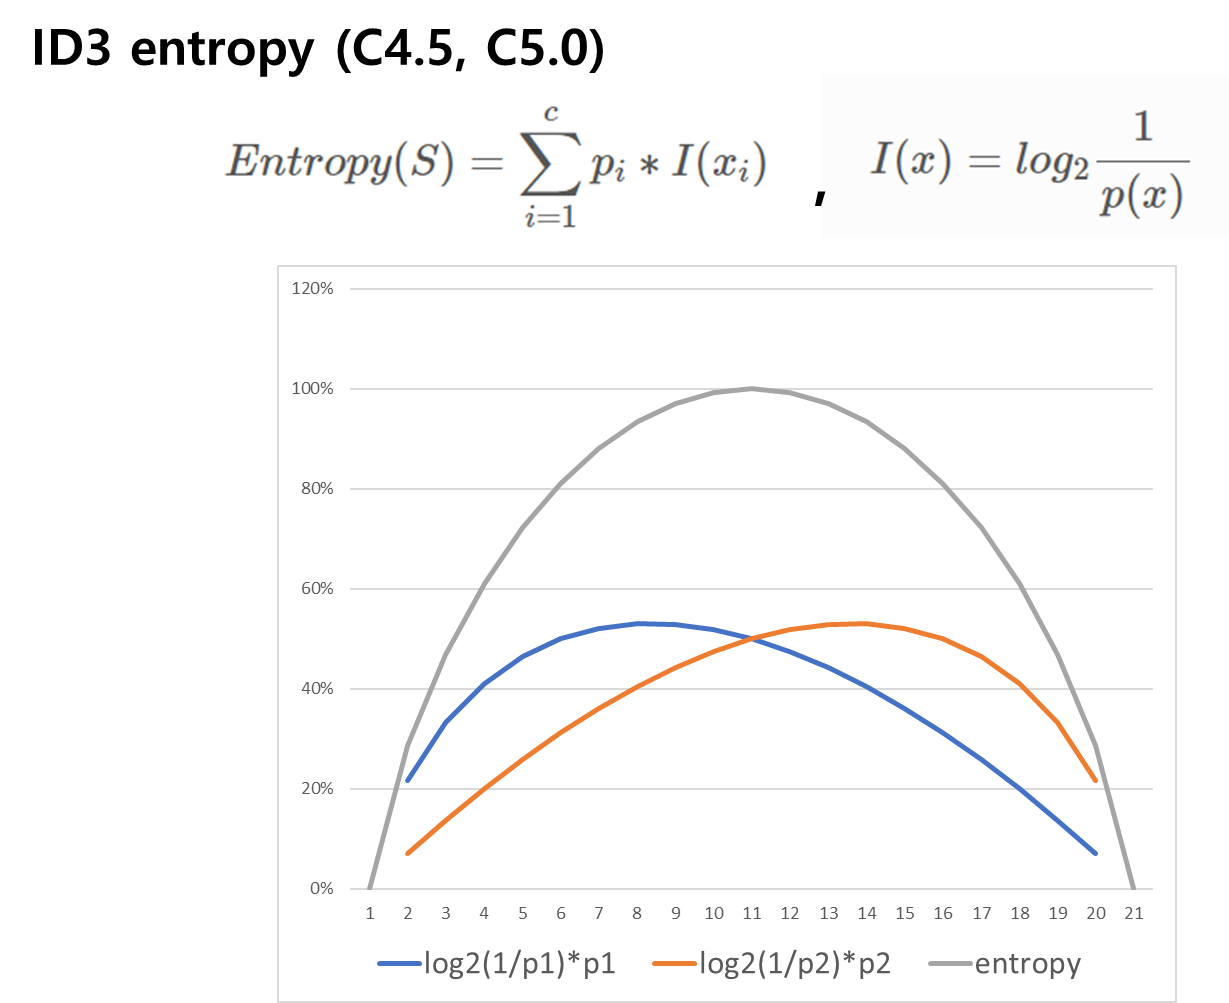